$$ Question \quad 1$$

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# Load MNIST dataset
print("Loading MNIST dataset...")
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = X / 255.0  # Scale pixels to [0,1] range

Loading MNIST dataset...


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
#logistic regression
log_reg = LogisticRegression(max_iter=100, multi_class='multinomial')
log_reg.fit(X_train, y_train)
log_reg_score = log_reg.score(X_test, y_test)

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
#stochastic gradient descent
sgd = SGDClassifier(loss='log_loss', max_iter=100, random_state=42) #random_state: seed of randomness 
#max_iter: number of iterations that passed
sgd.fit(X_train, y_train)
sgd_score = sgd.score(X_test, y_test)

In [6]:
print(f"Logistic Regression accuracy: {log_reg_score:.4f}")
print(f"SGD Classifier accuracy: {sgd_score:.4f}")

Logistic Regression accuracy: 0.9203
SGD Classifier accuracy: 0.9104


In [8]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'alpha': [0.0001, 0.001, 0.01], # here alpha represents the regularization of our model
    'learning_rate': ['optimal', 'adaptive']
}


In [9]:
grid_search = GridSearchCV(
    SGDClassifier(loss='log_loss', max_iter=100, random_state=42),
    param_grid,
    cv=3,
    n_jobs=-1
)

In [10]:
grid_search.fit(X_train, y_train)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 892, in fit
    self._more_validate_params()
  File "/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 149, in _mo

GridSearchCV(cv=3,
             estimator=SGDClassifier(loss='log_loss', max_iter=100,
                                     random_state=42),
             n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'learning_rate': ['optimal', 'adaptive'],
                         'penalty': ['l1', 'l2']})

In [11]:
print("\nBest parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameters: {'alpha': 0.0001, 'learning_rate': 'optimal', 'penalty': 'l2'}
Best cross-validation score: 0.9086250063193889


$L_2$ generally performs better than $L_1$. $L_2$ is the mean squared errors, requiring the assumptions that the errors are normally distributed. $L1$ performs better when we have outliers.

$L_2$ is mathematically better behaved compared to $L_1$.

Generally, we tried all different parameters, tested it and then we will select the one with the best performance. 

In [12]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
misclassified_idx = np.where(y_pred != y_test)[0]

In [13]:
def plot_digits(images, true_labels, pred_labels, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    for idx, ax in enumerate(axes):
        ax.imshow(images[idx].reshape(28, 28), cmap='gray')
        ax.set_title(f'True: {true_labels[idx]}\nPred: {pred_labels[idx]}')
        ax.axis('off')
    return fig


In [14]:
misclassified_images = X_test[misclassified_idx[:5]]
misclassified_true = y_test[misclassified_idx[:5]]
misclassified_pred = y_pred[misclassified_idx[:5]]

In [15]:
# Calculate random guessing baseline
num_classes = len(np.unique(y))
random_baseline = 1.0 / num_classes

print("\nRandom guessing baseline accuracy:", random_baseline)
print("Best model accuracy:", best_model.score(X_test, y_test))


Random guessing baseline accuracy: 0.1
Best model accuracy: 0.9104285714285715


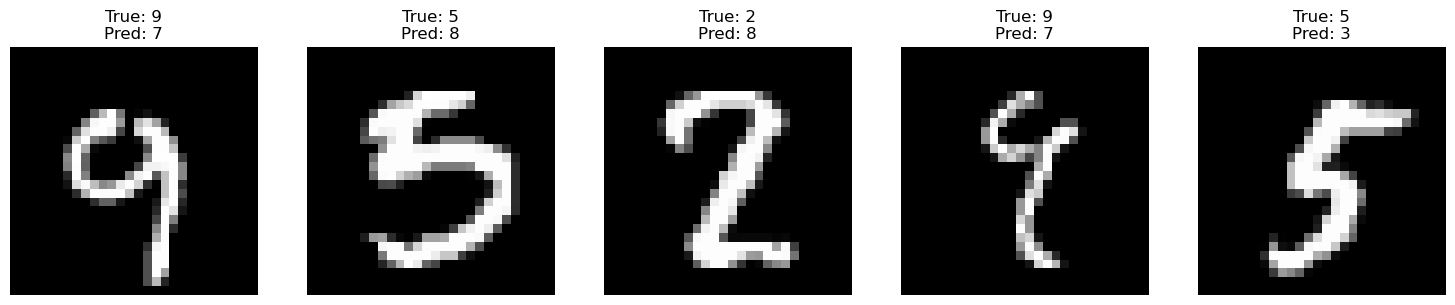

In [16]:
fig = plot_digits(misclassified_images, misclassified_true, misclassified_pred)
plt.tight_layout()
plt.show()


$$ 1D \quad Ising \quad Model$$

In [46]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [48]:
def generate_ising_data(n_samples, size=10):
    """Generate 1D Ising model configurations and energies."""
    configurations = np.random.choice([-1, 1], size=(n_samples, size))
    
    # Calculate energies (nearest neighbor interactions)
    energies = np.zeros(n_samples)
    for i in range(n_samples):
        energy = 0
        for j in range(size-1):
            energy -= configurations[i, j] * configurations[i, j+1]
        # Periodic boundary condition
        energy -= configurations[i, -1] * configurations[i, 0]
        energies[i] = energy
        
    return configurations, energies

In [49]:
def calculate_errors(model, X_train, X_test, y_train, y_test):
    """Calculate training and test errors."""
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_error = np.mean((y_train - y_train_pred) ** 2)
    test_error = np.mean((y_test - y_test_pred) ** 2)
    
    return train_error, test_error

In [50]:
sample_sizes = [100, 500, 1000, 5000, 10000, ]
system_size = 10


The plot should be errors against strength. 
1. The error with L1 goes down and then goes up: The error is high when strength is low, because the L1 error is less mathematically behaved. The reason that L1 goes up becuase we put too much weight on the penalty terms. 
2. For L2, it will stay smooth and go up as the strength of parameter increses. 

3. For LS, it will be a flat line.

In [51]:
results = {
    'Linear': {'train_errors': [], 'test_errors': []},
    'Ridge': {'train_errors': [], 'test_errors': []},
    'Lasso': {'train_errors': [], 'test_errors': []}
}


In [52]:
# Generate and analyze data for each sample size
for n_samples in sample_sizes:
    # Generate data
    X, y = generate_ising_data(n_samples, system_size)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train and evaluate models
    models = {
        'Linear': LinearRegression(),
        'Ridge': Ridge(alpha=0.5),
        'Lasso': Lasso(alpha=0.5)
    }
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        train_error, test_error = calculate_errors(model, X_train, X_test, y_train, y_test)
        results[name]['train_errors'].append(train_error)
        results[name]['test_errors'].append(test_error)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


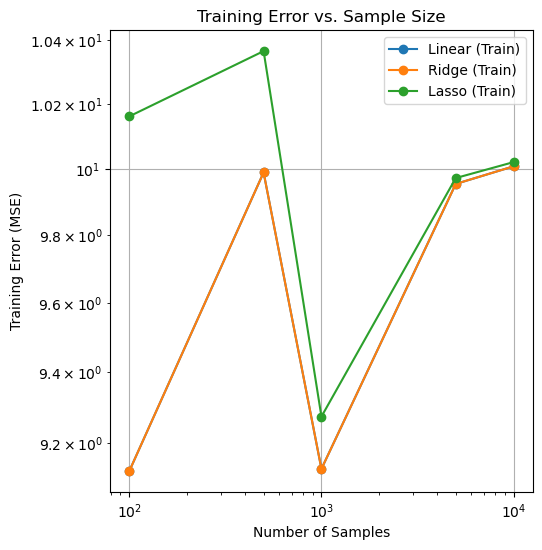

In [53]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for name in results:
    plt.plot(sample_sizes, results[name]['train_errors'], 'o-', label=f'{name} (Train)')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Samples')
plt.ylabel('Training Error (MSE)')
plt.title('Training Error vs. Sample Size')
plt.legend()
plt.grid(True)


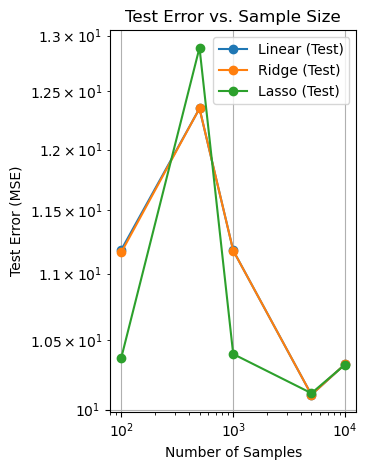

In [54]:
plt.subplot(1, 2, 2)
for name in results:
    plt.plot(sample_sizes, results[name]['test_errors'], 'o-', label=f'{name} (Test)')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Samples')
plt.ylabel('Test Error (MSE)')
plt.title('Test Error vs. Sample Size')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

$$ Perceptron$$

In [55]:
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier


In [56]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])


In [57]:
single_perceptron = Perceptron(max_iter=100)
single_perceptron.fit(X, y)

# Try with multi-layer perceptron (multiple perceptrons)
mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='relu', max_iter=1000)
mlp.fit(X, y)


MLPClassifier(hidden_layer_sizes=(2,), max_iter=1000)

In [58]:
# Create a grid of points
x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Plot the results
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

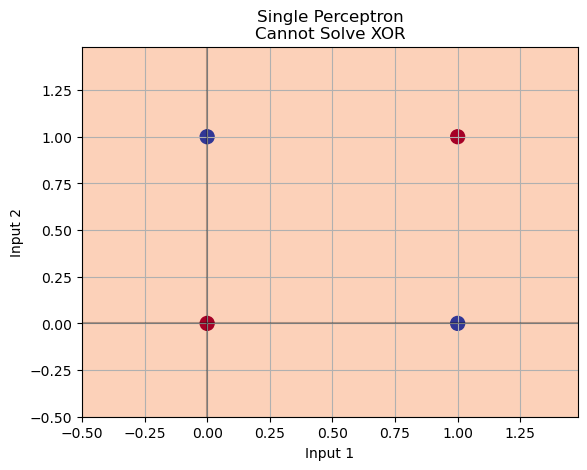

In [63]:
# Predict for all points in our grid
grid_points = np.c_[xx.ravel(), yy.ravel()]  # Combine x and y coordinates
Z = single_perceptron.predict(grid_points)    # Get predictions
Z = Z.reshape(xx.shape)                       # Reshape to match grid

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')  # Fill areas with color

# Plot the actual XOR points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', 
           s=100)

plt.title('Single Perceptron\nCannot Solve XOR')
plt.xlabel('Input 1')
plt.ylabel('Input 2')

# Add grid for better visualization
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

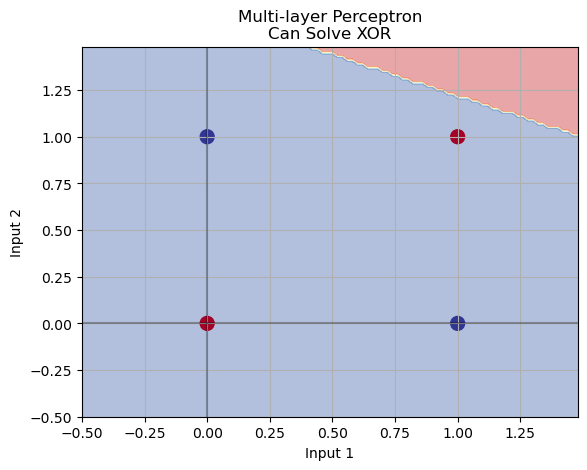

In [65]:
# Predict for all points in our grid
Z = mlp.predict(grid_points)
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')

# Plot the actual XOR points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu',
          s=100)

plt.title('Multi-layer Perceptron\nCan Solve XOR')
plt.xlabel('Input 1')
plt.ylabel('Input 2')

# Add grid for better visualization
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

We could use multiple lines to seperate different points.

?